In [1]:
import pandas as pd
import numpy as np

In [2]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
nome_das_colunas = {
    'expected_hours': 'horas_esperadas',
    'price': 'preco',
    'unfinished': 'nao_finalizado'
}

dados.rename(columns=nome_das_colunas, inplace=True)

In [4]:
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [5]:
# Mapeando valores e trocando na base para intuitivamente ter mais lógica:
troca_de_valores = {
    0:1,
    1:0
}

dados['finalizado'] = dados['nao_finalizado'].map(troca_de_valores)

In [6]:
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [7]:
dados.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


In [8]:
import seaborn as sns

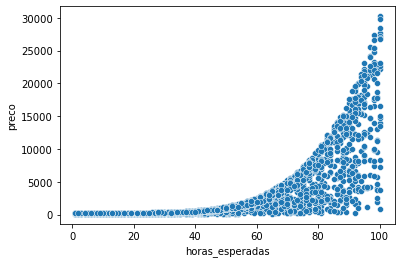

In [9]:
sns.scatterplot(x='horas_esperadas', y='preco', data=dados)

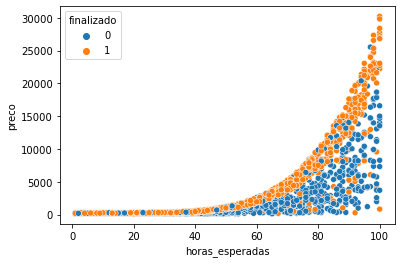

In [10]:
sns.scatterplot(x='horas_esperadas', y='preco', hue='finalizado', data=dados)

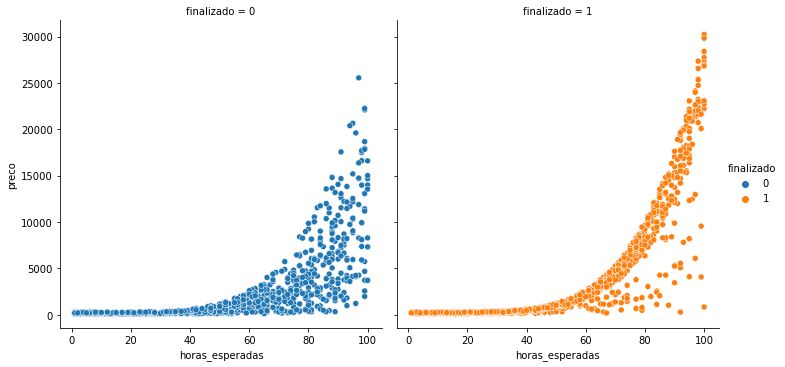

In [11]:
sns.relplot(x='horas_esperadas', y='preco', col='finalizado', hue='finalizado', data=dados)

In [12]:
# Separando a base em x e y (padrão) para modelar conforme 
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [13]:
# Usando um modelo linear:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED) # Tirando a aleatoriedade do modelo Linear SVC que tem como base a aleatoriedade do numpy.

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, random_state=SEED, stratify=y)
print("Treinaremos com %d elementos e testaremos com %d elementos." % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%." % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos.
A acurácia foi 54.07%.


C:\Users\gades\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [14]:
# Simulando um modelo em que todos os sites foram finalizados para verificar a acurácia e comparar com o modelo acima:
import numpy as np

linha_de_base = np.ones(540)
acuracia = accuracy_score(teste_y, linha_de_base) * 100
print("A acurácia do algoritmo de baseline foi %.2f%%." % acuracia)

A acurácia do algoritmo de baseline foi 52.59%.


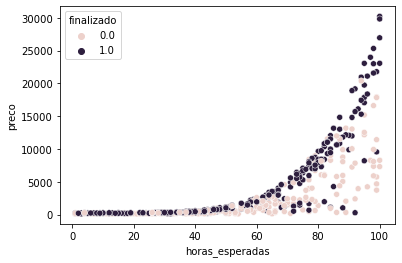

In [15]:
sns.scatterplot(x='horas_esperadas', y='preco', hue=teste_y, data=dados)

In [16]:
# Curva de decisão:
# Pintando várias bolinhas no espaço em branco do gráfico, o algoritmo deve "saber" que se um ponto estiver em baixo
# da curva, o projeto não será finalizado e se um ponto estiver acima da curva será finalizado.

In [17]:
x_min = teste_x['horas_esperadas'].min()
x_max = teste_x['horas_esperadas'].max()
y_min = teste_x['preco'].min()
y_max = teste_x['preco'].max()

In [18]:
print(x_min, x_max, y_min, y_max)

1 100 100 30223


In [19]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/pixels)

In [20]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [21]:
Z = modelo.predict(pontos)
Z.shape

(10000,)

In [22]:
Z = Z.reshape(xx.shape)
Z.shape

(100, 100)

In [23]:
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

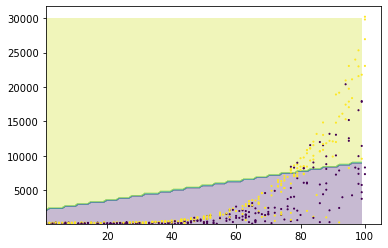

In [24]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x['horas_esperadas'], teste_x['preco'], c=teste_y, s=1.2) # c = color, s = size (dos pontos)

In [25]:
# Cruva de decisão péssima porque o algoritmo só consegue avaliar relacões lineares (linhas retas).

In [26]:
# Usando um modelo SVC:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED) # Tirando a aleatoriedade do modelo SVC que tem como base a aleatoriedade do numpy.

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, random_state=SEED, stratify=y)
print("Treinaremos com %d elementos e testaremos com %d elementos." % (len(treino_x), len(teste_x)))

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%." % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos.
A acurácia foi 55.19%.


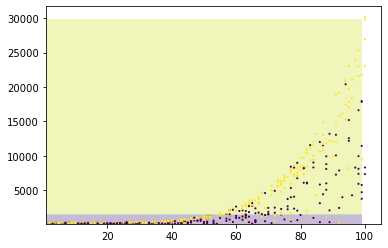

In [27]:
# Curva de decisão:
x_min = teste_x['horas_esperadas'].min()
x_max = teste_x['horas_esperadas'].max()
y_min = teste_x['preco'].min()
y_max = teste_x['preco'].max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x['horas_esperadas'], teste_x['preco'], c=teste_y, s=1.2) 

In [28]:
# Talvez o problema do modelo seja a diferença entre as escalas:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED) # Tirando a aleatoriedade do modelo SVC que tem como base a aleatoriedade do numpy.

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, random_state=SEED, stratify=y)
print("Treinaremos com %d elementos e testaremos com %d elementos." % (len(raw_treino_x), len(raw_teste_x)))

# Reescalonando os dados 'x' para treino:
scaler = StandardScaler()
scaler.fit(raw_treino_x) # Treinando o processo de escalonagem.
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%." % acuracia)


Treinaremos com 1617 elementos e testaremos com 540 elementos.
A acurácia foi 66.85%.


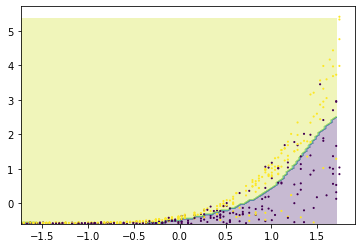

In [29]:
# Curva de decisão:

data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1.2) 